In [ ]:
print("hello")

hello


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
data = pd.read_csv("/content/drive/MyDrive/titanic.csv")

In [ ]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Survived     418 non-null    int64  
 2   Pclass       418 non-null    int64  
 3   Name         418 non-null    object 
 4   Sex          418 non-null    object 
 5   Age          332 non-null    float64
 6   SibSp        418 non-null    int64  
 7   Parch        418 non-null    int64  
 8   Ticket       418 non-null    object 
 9   Fare         417 non-null    float64
 10  Cabin        91 non-null     object 
 11  Embarked     418 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 39.3+ KB


In [ ]:
print(data.isnull().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64


In [ ]:
#data cleaning
#fill the missing age values with median.
data['Age'].fillna(data['Age'].median(), inplace=True)

<ipython-input-10-51de21367daa>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Age'].fillna(data['Age'].median(), inplace=True)


In [ ]:
data.drop(['Cabin', 'Ticket'], axis=1, inplace=True)

In [ ]:
data.dropna(subset=['Embarked'], inplace=True)

In [ ]:
data['Sex'] = data['Sex'].astype('category')
data['Embarked'] = data['Embarked'].astype('category')

<ipython-input-15-74e7b460de20>:4: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Sex', y='Survived', data=data, ci=None)


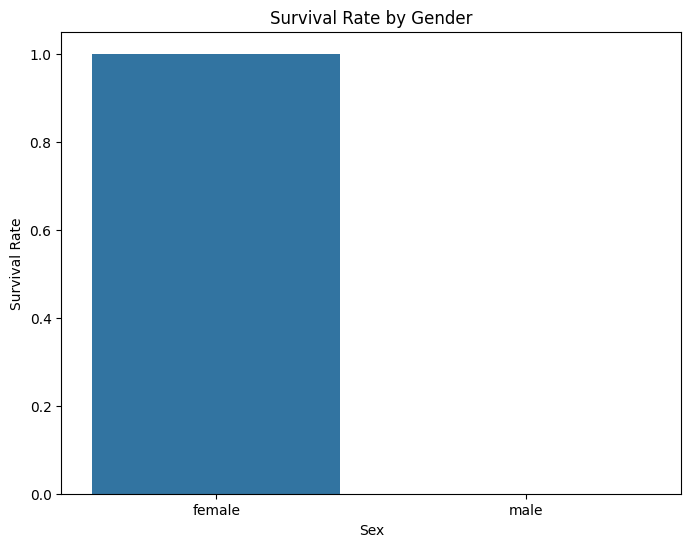

In [ ]:
#exploratory data analysis
# 1. Survival rate by gender
plt.figure(figsize=(8, 6))
sns.barplot(x='Sex', y='Survived', data=data, ci=None)
plt.title('Survival Rate by Gender')
plt.ylabel('Survival Rate')
plt.show()

<ipython-input-17-5c9996365b03>:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Pclass', y='Survived', data=data, ci=None)


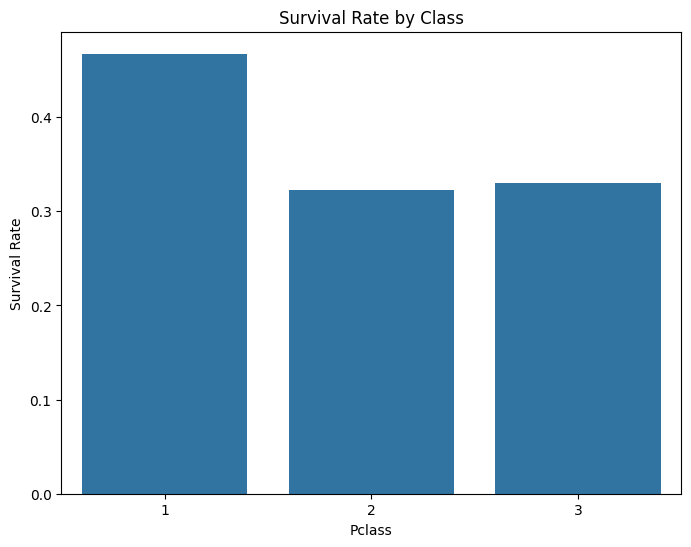

In [ ]:
# 2. Survival rate by class
plt.figure(figsize=(8, 6))
sns.barplot(x='Pclass', y='Survived', data=data, ci=None)
plt.title('Survival Rate by Class')
plt.ylabel('Survival Rate')
plt.show()

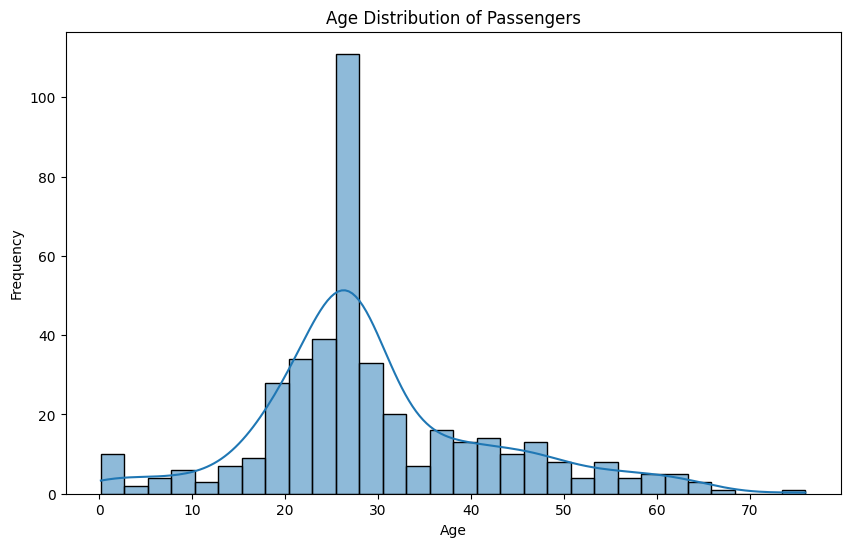

In [ ]:
# 3. Age distribution
plt.figure(figsize=(10, 6))
sns.histplot(data['Age'], bins=30, kde=True)
plt.title('Age Distribution of Passengers')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

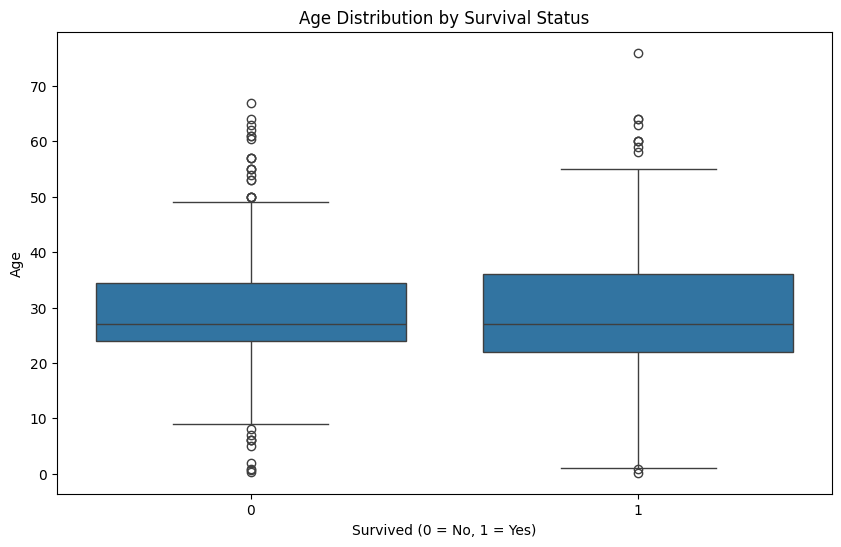

In [ ]:
# 4. Survival rate by age
plt.figure(figsize=(10, 6))
sns.boxplot(x='Survived', y='Age', data=data)
plt.title('Age Distribution by Survival Status')
plt.xlabel('Survived (0 = No, 1 = Yes)')
plt.ylabel('Age')
plt.show()

<ipython-input-20-0ab5039f1357>:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Embarked', y='Survived', data=data, ci=None)


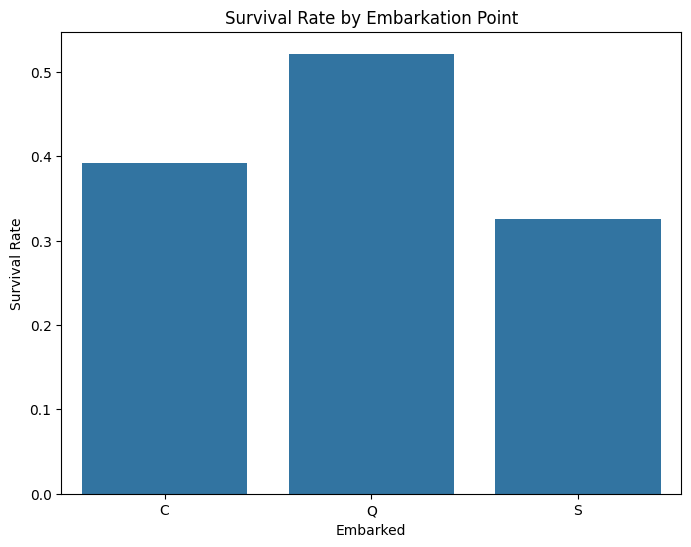

In [ ]:
# 5. Survival rate by embarked location
plt.figure(figsize=(8, 6))
sns.barplot(x='Embarked', y='Survived', data=data, ci=None)
plt.title('Survival Rate by Embarkation Point')
plt.ylabel('Survival Rate')
plt.show()

In [ ]:
# Convert categorical variables to numeric using one-hot encoding
titanic_encoded = pd.get_dummies(data, columns=['Sex', 'Embarked'], drop_first=True)

# Select only numeric columns for the correlation matrix
numeric_cols = titanic_encoded.select_dtypes(include=['float64', 'int64']).columns

# Calculate the correlation matrix
correlation_matrix = titanic_encoded[numeric_cols].corr()

# Plot the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()